In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from time import time
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
df_test = pd.read_csv('./data/ARCENE/arcene_test.data', header=None, sep=' ')
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,123,0,171,424,0,257,164,0,0,16,...,0,0,0,0,206,369,0,0,357,NaN
1,6,81,7,577,69,466,0,0,167,141,...,341,130,56,67,346,350,0,34,339,NaN
2,3,0,117,41,0,340,290,17,25,180,...,283,110,0,26,225,360,0,6,222,NaN
3,0,54,108,141,0,535,485,0,0,0,...,637,55,0,51,6,54,0,0,396,NaN
4,37,92,155,310,84,255,98,0,14,112,...,290,113,89,9,156,283,0,0,174,NaN


In [3]:
df_train = pd.read_csv('./data/ARCENE/arcene_train.data', header=None, sep=' ')
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,71,0,95,0,538,404,20,0,0,...,570,86,0,36,0,80,0,0,524,NaN
1,0,41,82,165,60,554,379,0,71,0,...,605,69,7,473,0,57,0,284,423,NaN
2,0,0,1,40,0,451,402,0,0,0,...,593,28,0,24,0,90,0,34,508,NaN
3,0,56,44,275,14,511,470,0,0,0,...,600,0,26,86,0,102,0,0,469,NaN
4,105,0,141,348,0,268,329,0,0,1,...,0,0,0,0,190,301,0,0,354,NaN


In [4]:
df_valid = df_train_labels = pd.read_csv('./data/ARCENE/arcene_valid.data', header=None, sep=' ')
df_valid

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,0,156,138,2,635,444,0,1,0,...,692,42,0,50,67,87,0,0,465,NaN
1,0,7,0,7,0,251,0,0,22,222,...,673,0,0,18,201,317,0,34,199,NaN
2,0,32,0,470,53,493,0,0,140,147,...,461,20,34,165,225,53,0,47,219,NaN
3,0,77,0,202,0,432,472,0,60,0,...,555,13,0,488,0,71,0,177,487,NaN
4,0,34,102,522,2,474,473,0,39,0,...,630,0,29,192,0,74,0,5,416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24,73,0,436,92,400,0,0,139,261,...,540,0,86,130,365,58,17,3,37,NaN
96,11,58,50,332,109,393,122,0,75,134,...,355,156,77,26,277,265,0,36,261,NaN
97,93,32,137,319,0,264,231,21,0,0,...,9,0,0,0,244,309,0,276,312,NaN
98,119,12,198,339,0,289,410,0,0,4,...,0,37,0,0,256,402,0,0,350,NaN


In [5]:
df_train_labels = pd.read_csv('./data/ARCENE/arcene_train.labels', header=None)
df_train_labels

,0
0,1
1,-1
2,1
3,1
4,-1
...,...
95,-1
96,-1
97,1
98,-1


In [6]:
df_final = pd.concat([df_train, df_valid])
df_final.reset_index(inplace = True, drop = True)

In [7]:
df_valid_labels = pd.read_csv('./data/arcene_valid.labels', header=None)
df_valid_labels

,0
0,-1
1,-1
2,-1
3,1
4,1
...,...
95,-1
96,-1
97,1
98,1


In [8]:
op = pd.concat([df_train_labels, df_valid_labels])

In [9]:
op

,0
0,1
1,-1
2,1
3,1
4,-1
...,...
95,-1
96,-1
97,1
98,1


In [10]:
op.reset_index(inplace = True, drop = True)

In [11]:
df_final['y'] = op

In [12]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,10000,y
0,0,71,0,95,0,538,404,20,0,0,...,86,0,36,0,80,0,0,524,NaN,1
1,0,41,82,165,60,554,379,0,71,0,...,69,7,473,0,57,0,284,423,NaN,-1
2,0,0,1,40,0,451,402,0,0,0,...,28,0,24,0,90,0,34,508,NaN,1
3,0,56,44,275,14,511,470,0,0,0,...,0,26,86,0,102,0,0,469,NaN,1
4,105,0,141,348,0,268,329,0,0,1,...,0,0,0,190,301,0,0,354,NaN,-1


In [13]:
df_final.isnull().sum()

0          0
1          0
2          0
3          0
4          0
        ... 
9997       0
9998       0
9999       0
10000    200
y          0
Length: 10002, dtype: int64

In [14]:
df_final.drop(df_final.columns[-2], axis=1, inplace=True)

<Axes: >

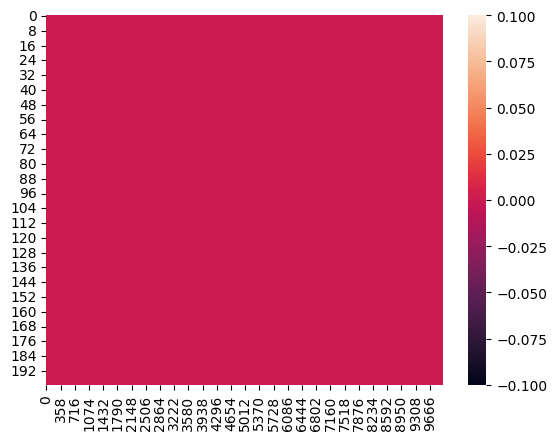

In [15]:
sns.heatmap(df_final.isnull())

In [16]:
X = df_final.drop('y', axis=1)

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
4,105,0,141,348,0,268,329,0,0,1,...,813,0,0,0,0,190,301,0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,24,73,0,436,92,400,0,0,139,261,...,394,540,0,86,130,365,58,17,3,37
196,11,58,50,332,109,393,122,0,75,134,...,235,355,156,77,26,277,265,0,36,261
197,93,32,137,319,0,264,231,21,0,0,...,929,9,0,0,0,244,309,0,276,312
198,119,12,198,339,0,289,410,0,0,4,...,781,0,37,0,0,256,402,0,0,350


In [18]:
X.shape

(200, 10000)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='Count'>

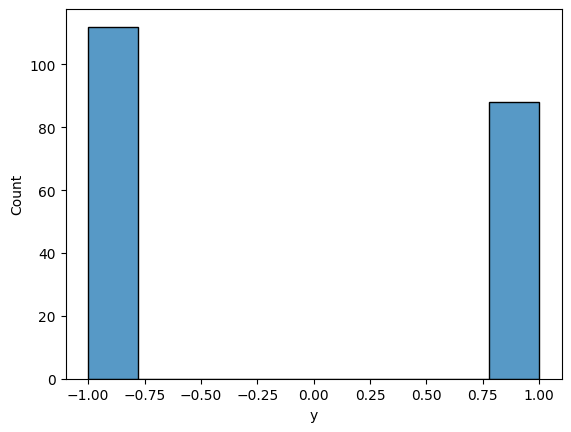

In [19]:
sns.histplot(df_final['y'])

In [20]:
df_final['y'].value_counts()

y
-1    112
 1     88
Name: count, dtype: int64

In [21]:
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_var_explained = np.cumsum(explained_variance_ratio)
k = np.argmax(cumulative_var_explained >= 0.95) + 1
pca = PCA(n_components=k)
X_reduced = pca.fit_transform(X)

In [22]:
k

70

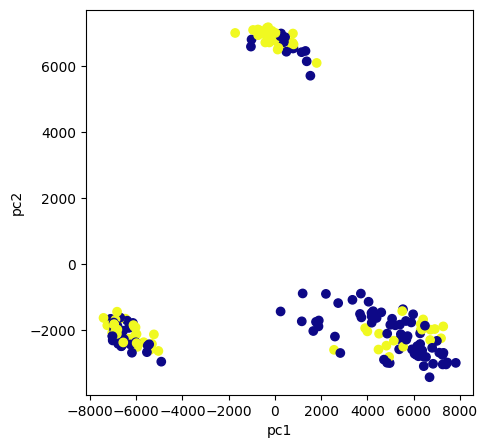

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=df_final['y'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

## PCA

In [24]:
def pca_m(X, n_components):
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    pca = PCA(n_components=n_components)
    pca.fit(X_std)
    x1 = pca.transform(X_std)
    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(5,5))
    plt.scatter(x1[:,0],x1[:,1],c=df_final['y'],cmap='plasma')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    print(pca.explained_variance_)
    return pca

[2167.46936662 1030.39322541]


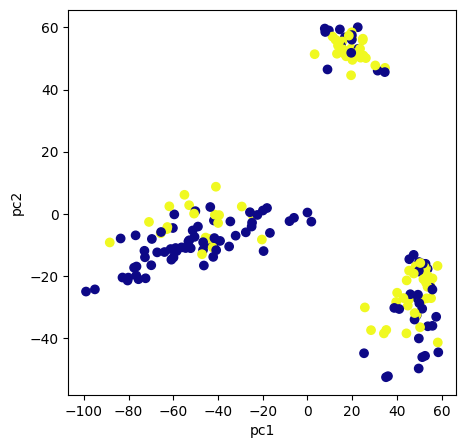

In [25]:
pca1 = pca_m(X,2)

[2167.46936662 1030.39322541  518.86572146  359.53820209  309.02824575]


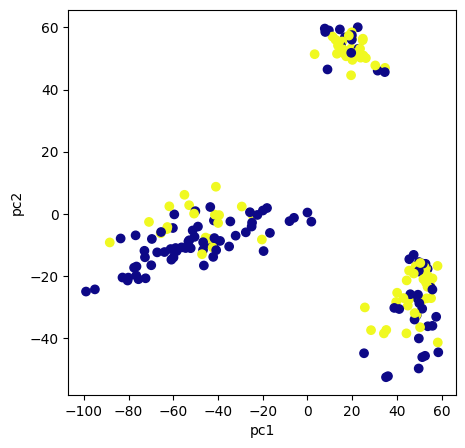

In [26]:
pca2 = pca_m(X,5)

[2167.46936662 1030.39322541  518.86572147  359.53820211  309.02824705
  269.03051672  205.66226639  177.8865629 ]


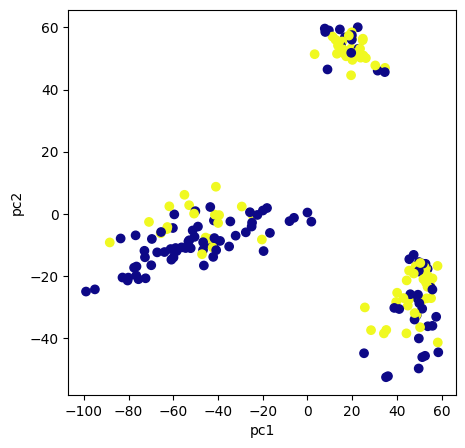

In [27]:
pca3 = pca_m(X,8)

[2167.46936662 1030.39322541  518.86572147  359.53820211  309.02824705
  269.03051677  205.66227004  177.88658463  138.49251406  124.30190447]


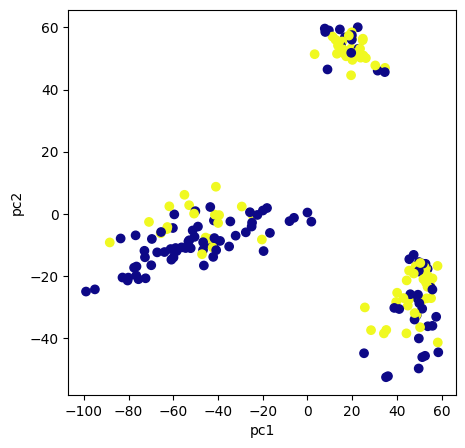

In [28]:
pca4 = pca_m(X,10)

[2167.46936662 1030.39322541  518.86572134  359.53819963  309.02823368
  269.03050973  205.66221605  177.88646684  138.49033806  124.30285196
  115.87929913  100.05896987   96.74618769   90.49475712   87.78977313
   80.33762654   72.48898102   70.64669859   65.21535195   61.51417101]


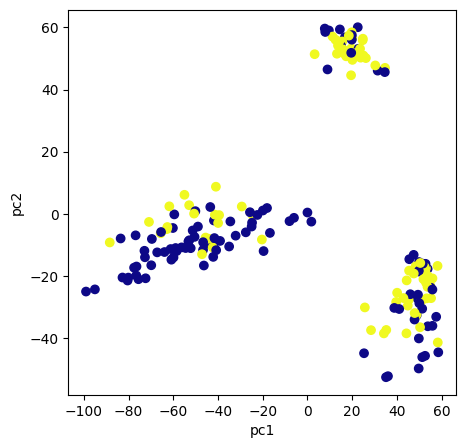

In [29]:
pca5 = pca_m(X,20)

## Naive Bayes

In [30]:
def NaiveBayes(df_final,n_comp):
    st = time()
    pca = PCA(n_components=n_comp)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)

    model = GaussianNB()
    model.fit(X_train_p,y_train)
    y_pred = model.predict(X_test_p)
    acc = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(4,4))
    plt.title(f"For Components: {n_comp}")
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='Blues')
    plt.show()
    et = time()
    return model, et-st, acc

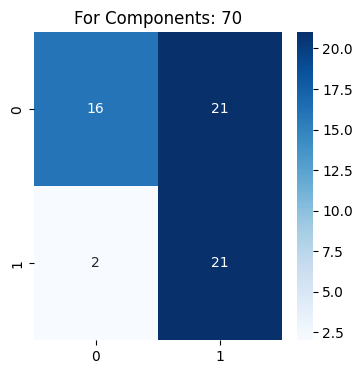

In [31]:
_,ac,t = NaiveBayes(df_final,k)

In [32]:
print('Accuracy: ',ac, ' \nTime:', np.round(t, 3), 'seconds')

Accuracy:  2.5842649936676025  
Time: 0.617 seconds


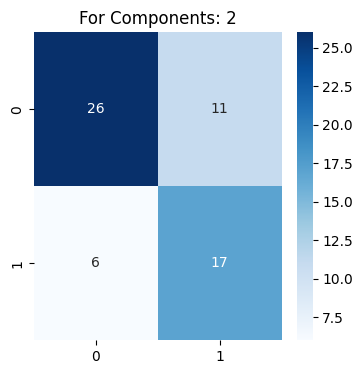

Accuracy:  0.7166666666666667  
Time: 0.659 seconds


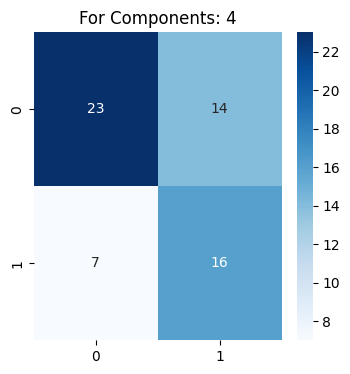

Accuracy:  0.65  
Time: 0.618 seconds


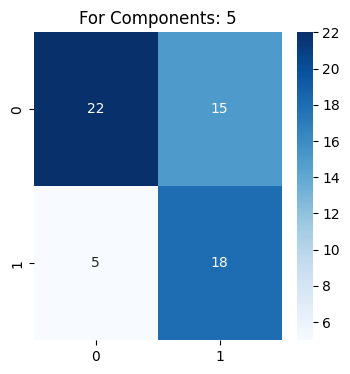

Accuracy:  0.6666666666666666  
Time: 0.836 seconds


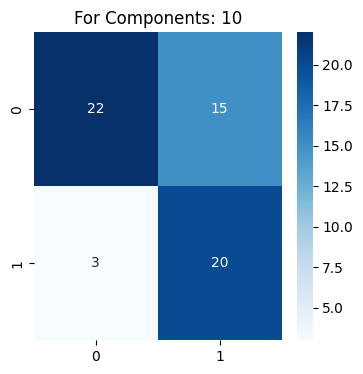

Accuracy:  0.7  
Time: 0.923 seconds


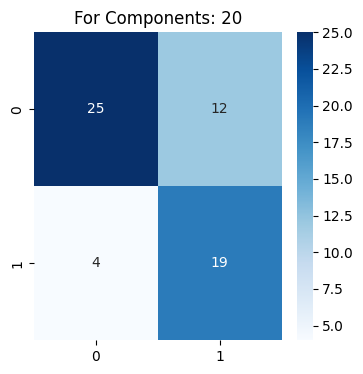

Accuracy:  0.7333333333333333  
Time: 0.863 seconds


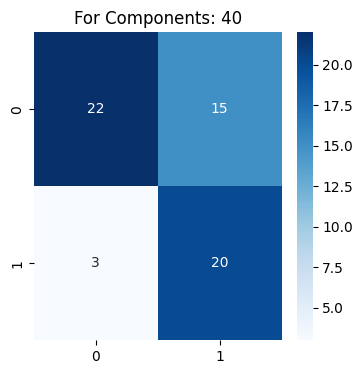

Accuracy:  0.7  
Time: 6.946 seconds


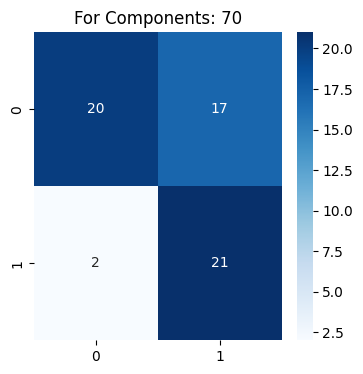

Accuracy:  0.6833333333333333  
Time: 3.89 seconds


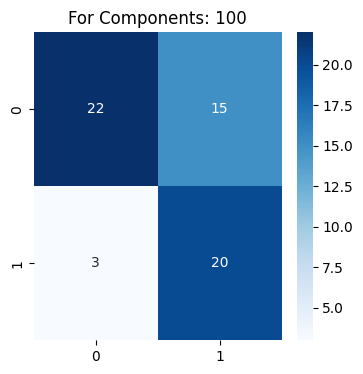

Accuracy:  0.7  
Time: 7.828 seconds


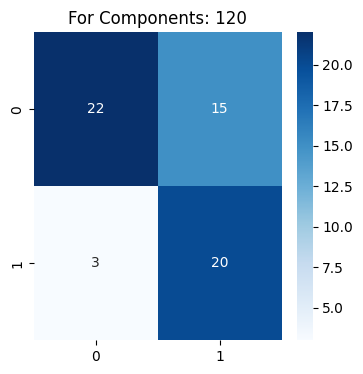

Accuracy:  0.7  
Time: 8.411 seconds


In [33]:
pca_comps = [2,4,5,10,20,40,70,100,120]
accs = []
times = []
for i in pca_comps:
    model, tt,acc = NaiveBayes(df_final,i)
    print('Accuracy: ',acc, ' \nTime:', np.round(tt, 3), 'seconds')
    accs.append(acc)
    times.append(tt)

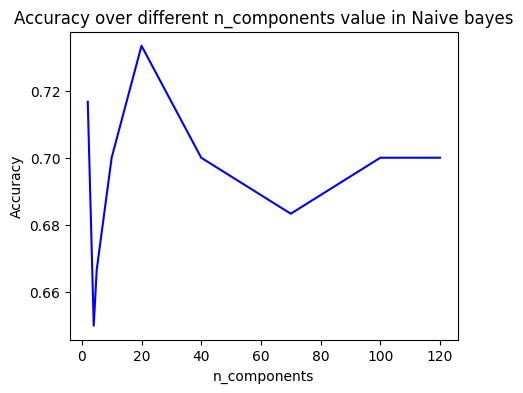

In [34]:
plt.figure(figsize=(5,4))
plt.title("Accuracy over different n_components value in Naive bayes")
plt.plot(pca_comps, accs, c='b')
plt.xlabel("n_components")
plt.ylabel("Accuracy")
plt.show()

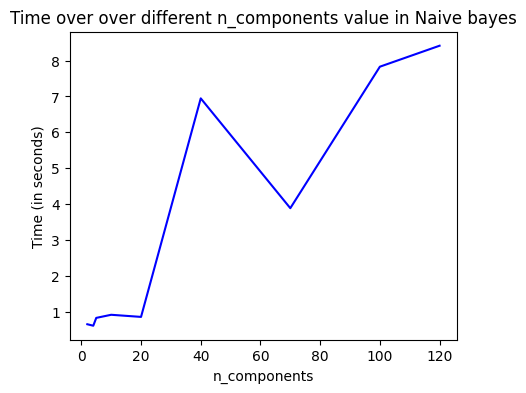

In [35]:
plt.figure(figsize=(5,4))
plt.title("Time over over different n_components value in Naive bayes")
plt.plot(pca_comps, times, c='b')
plt.xlabel("n_components")
plt.ylabel("Time (in seconds)")
plt.show()

## Naive Bayes without PCA

In [41]:
def NaiveBayes(df_final):
    st = time()
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)

    model = GaussianNB()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')
    et = time()
    return model, et-st, acc

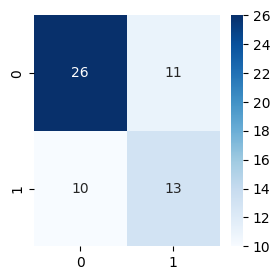

In [42]:
model,t, ac = NaiveBayes(df_final)

In [43]:
print('Accuracy: ',ac, ' \nTime:', np.round(t, 3), 'seconds')

Accuracy:  0.65  
Time: 0.36 seconds


## Naive Bayes Cross Validation 

In [44]:
from sklearn.model_selection import cross_val_score
st = time()
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)
model = GaussianNB()
scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')
et = time()
print(f"Time: {et-st}")
print(f'Cross-validation scores:{scores}')

Time: 0.5678279399871826
Cross-validation scores:[0.5        0.64285714 0.5        0.42857143 0.42857143 0.64285714
 0.71428571 0.42857143 0.35714286 0.57142857]


In [45]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5214


## SVM

In [37]:
def SupportVectorLinear(df_final,n_comp):
    st = time()
    pca = PCA(n_components=n_comp)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)

    model = SVC(kernel = 'linear')
    model.fit(X_train_p,y_train)
    y_pred = model.predict(X_test_p)
    acc = accuracy_score(y_test, y_pred)
    acc = np.round(acc*100,2)
    plt.figure(figsize=(3,3))
    plt.title(f"For Components: {n_comp}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
    plt.show()
    et = time()
    t = et-st
    print('Accuracy: ',acc, ' \nTime:', np.round(t, 3), 'seconds')
    return model, t, acc

In [47]:
def SupportVectorPoly(df_final,n_comp,degree):
    st = time()
    pca = PCA(n_components=n_comp)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)

    model = SVC(kernel = 'poly', degree=degree)
    model.fit(X_train_p,y_train)
    y_pred = model.predict(X_test_p)
    acc = accuracy_score(y_test, y_pred)
    acc = np.round(acc*100,2)
    plt.figure(figsize=(3,3))
    plt.title(f"For Components: {n_comp} , Degree: {degree}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
    plt.show()
    et = time()
    t = et-st
    return model, t, acc


In [48]:
def SupportVectorRbf(df_final,n_comp):
    st = time()
    pca = PCA(n_components=n_comp)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)

    model = SVC(kernel = 'rbf',)
    model.fit(X_train_p,y_train)
    y_pred = model.predict(X_test_p)
    acc = accuracy_score(y_test, y_pred)
    acc = np.round(acc*100,2)
    plt.figure(figsize=(3,3))
    plt.title(f"For Components: {n_comp}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
    plt.show()
    et = time()
    return model, et-st, acc

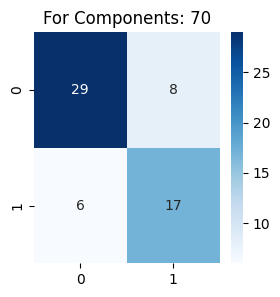

In [51]:
_,ac,t = SupportVectorLinear(df_final,k)

In [52]:
print('Accuracy: ',ac, ' \nTime:', np.round(t, 3), 'seconds')

Accuracy:  0.8527946472167969  
Time: 76.67 seconds


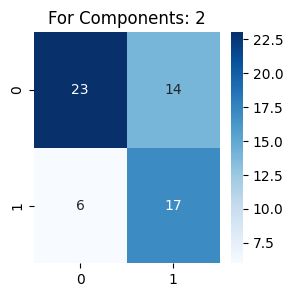

Accuracy:  66.67  
Time: 0.957 seconds


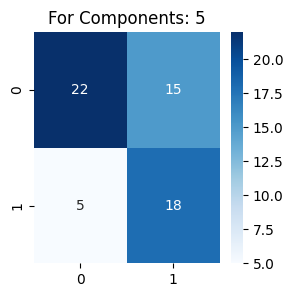

Accuracy:  66.67  
Time: 0.727 seconds


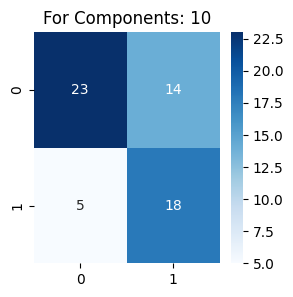

Accuracy:  68.33  
Time: 1.08 seconds


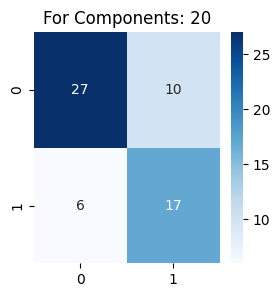

Accuracy:  73.33  
Time: 0.996 seconds


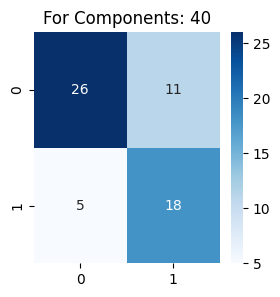

Accuracy:  73.33  
Time: 0.799 seconds


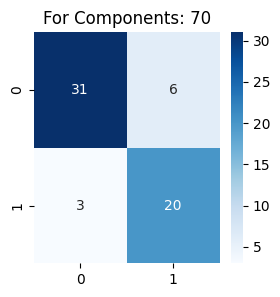

Accuracy:  85.0  
Time: 0.882 seconds


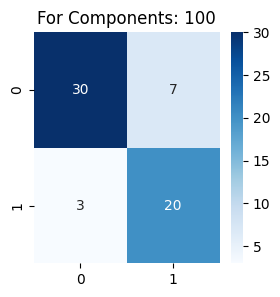

Accuracy:  83.33  
Time: 0.994 seconds


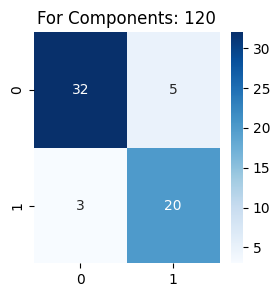

Accuracy:  86.67  
Time: 0.77 seconds


In [38]:
pca_comps = [2,5,10,20,40,70,100,120]
accs = []
times = []
for i in pca_comps:
    model, tt,acc = SupportVectorLinear(df_final,i)
    accs.append(acc)
    times.append(tt)

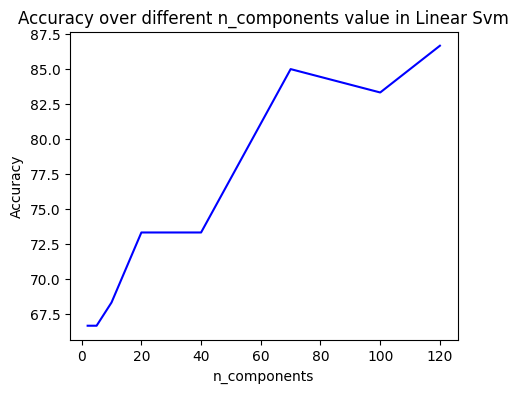

In [39]:
plt.figure(figsize=(5,4))
plt.title("Accuracy over different n_components value in Linear Svm")
plt.plot(pca_comps, accs, c='b')
plt.xlabel("n_components")
plt.ylabel("Accuracy")
plt.show()

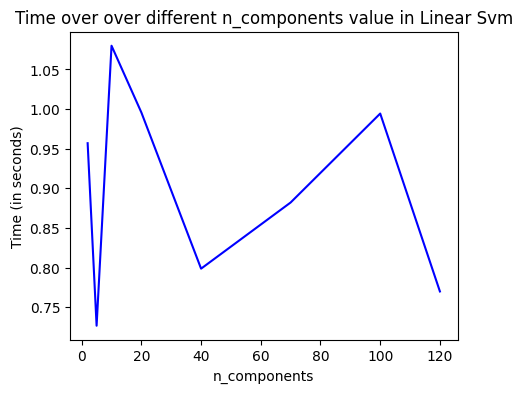

In [40]:
plt.figure(figsize=(5,4))
plt.title("Time over over different n_components value in Linear Svm")
plt.plot(pca_comps, times, c='b')
plt.xlabel("n_components")
plt.ylabel("Time (in seconds)")
plt.show()

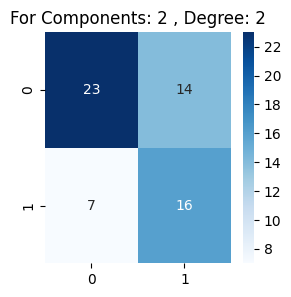

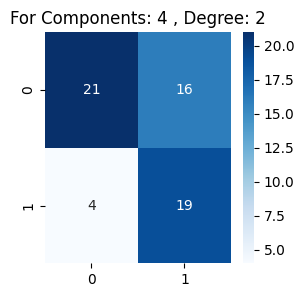

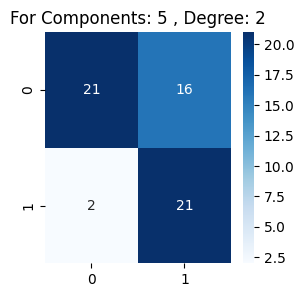

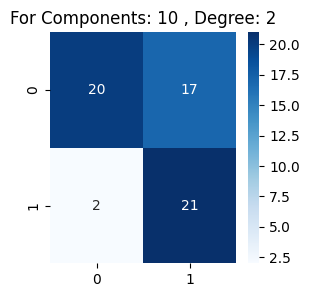

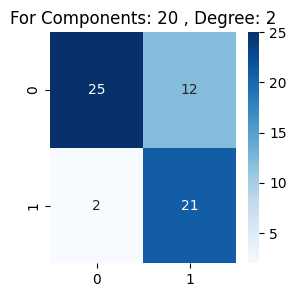

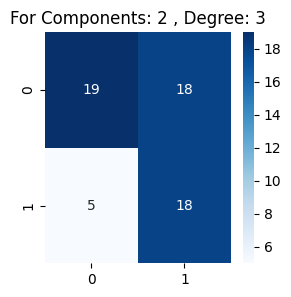

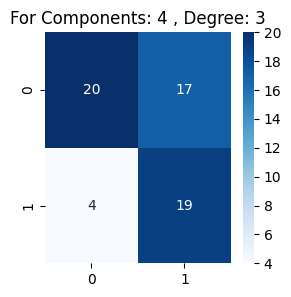

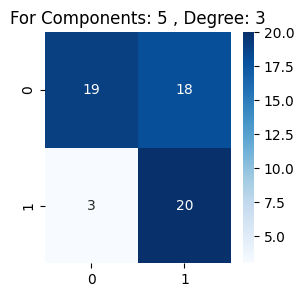

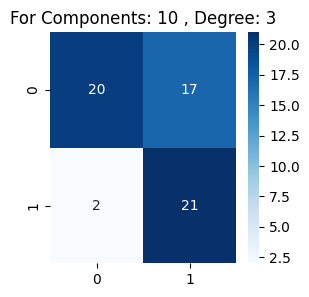

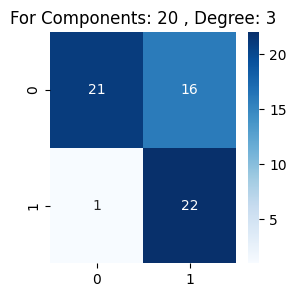

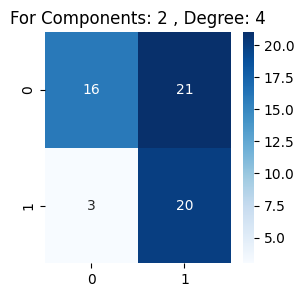

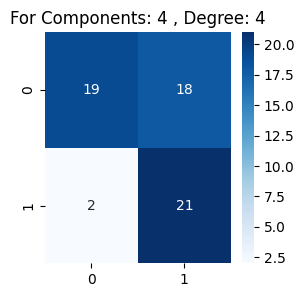

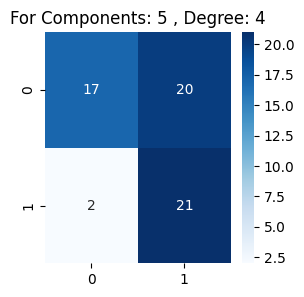

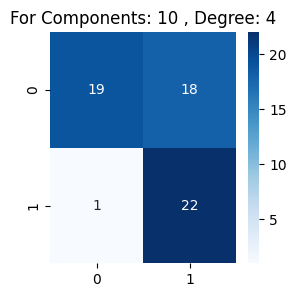

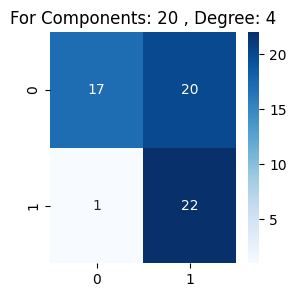

In [76]:
degrees = [2,3,4]
pca_comps = [2,4,5,10,20]
accs = []
times = []
for i in degrees:
    a = []
    t = []
    for j in pca_comps:
        model, tt,acc = SupportVectorPoly(df_final,j, i)
        a.append(acc)
        t.append(tt)
    accs.append(a)
    times.append(t)

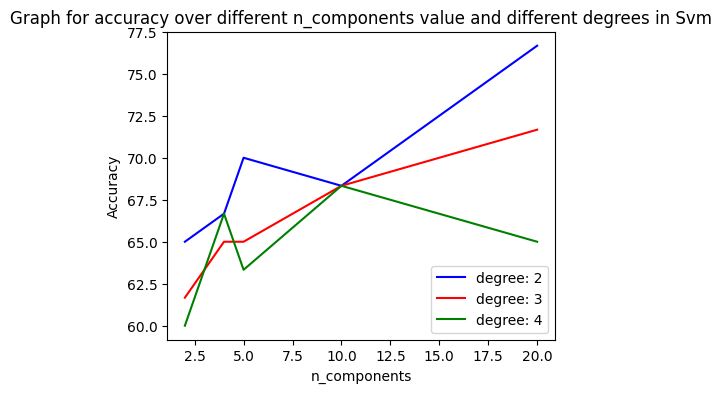

In [77]:
plt.figure(figsize=(5,4))
plt.title("Graph for accuracy over different n_components value and different degrees in Svm")
plt.plot(pca_comps, accs[0], c='b')
plt.plot(pca_comps, accs[1], c='r')
plt.plot(pca_comps, accs[2], c='g')
plt.legend(["degree: 2", "degree: 3", "degree: 4"], loc="lower right")
plt.xlabel("n_components")
plt.ylabel("Accuracy")
plt.show()

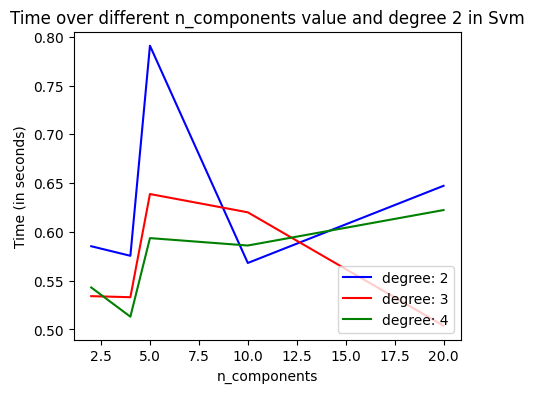

In [78]:
plt.figure(figsize=(5,4))
plt.title("Time over different n_components value and degree 2 in Svm")
plt.plot(pca_comps, times[0], c='b')
plt.plot(pca_comps, times[1], c='r')
plt.plot(pca_comps, times[2], c='g')
plt.legend(["degree: 2", "degree: 3", "degree: 4"], loc="lower right")
plt.xlabel("n_components")
plt.ylabel("Time (in seconds)")
plt.show()

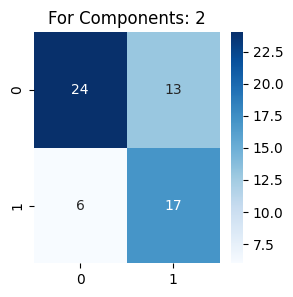

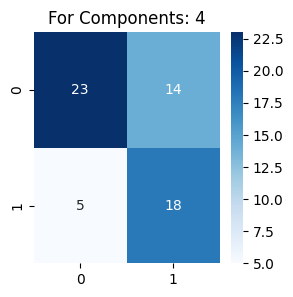

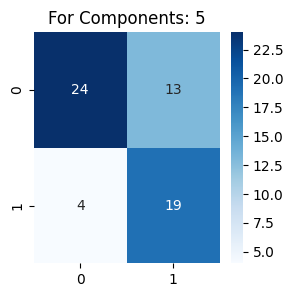

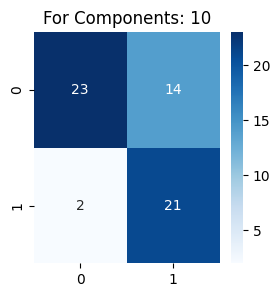

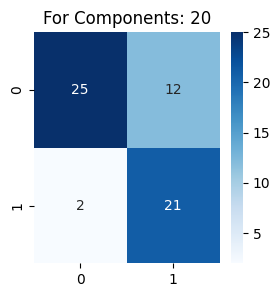

In [79]:
pca_comps = [2,4,5,10,20]
accs = []
times = []
for i in pca_comps:
    model, tt,acc = SupportVectorRbf(df_final,i)
    accs.append(acc)
    times.append(tt)

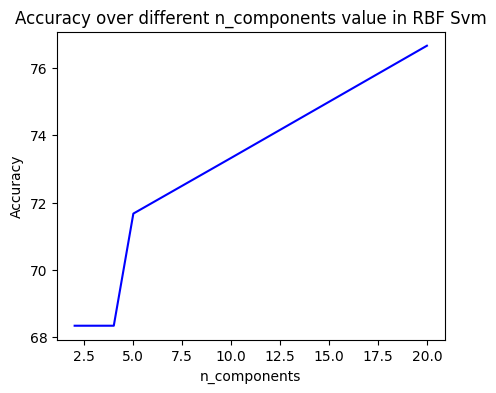

In [80]:
plt.figure(figsize=(5,4))
plt.title("Accuracy over different n_components value in RBF Svm")
plt.plot(pca_comps, accs, c='b')
plt.xlabel("n_components")
plt.ylabel("Accuracy")
plt.show()

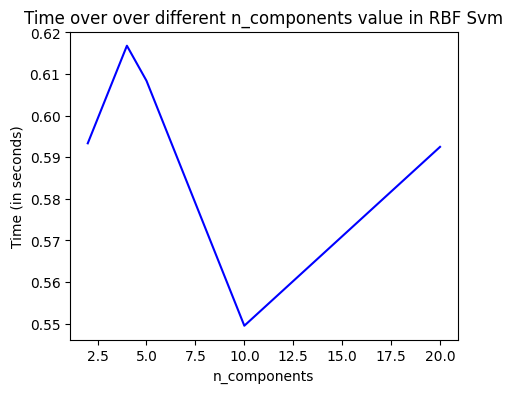

In [81]:
plt.figure(figsize=(5,4))
plt.title("Time over over different n_components value in RBF Svm")
plt.plot(pca_comps, times, c='b')
plt.xlabel("n_components")
plt.ylabel("Time (in seconds)")
plt.show()

## SVM with Cross Validation

In [42]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std,df_final['y'],random_state=42, test_size=0.3)

time:  0.8350894451141357 in Seconds


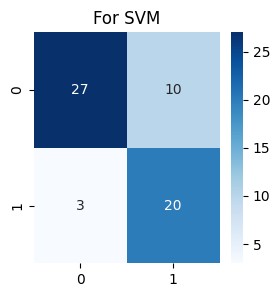

In [44]:
st1 = time()
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
et1 = time()
print("time: ",et1-st1, "in Seconds")
plt.figure(figsize=(3,3))
plt.title("For SVM")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

In [45]:
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

Accuracy: 78.33%


In [48]:
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4,1e5])
gammas = list([0.1, 1, 10, 100])

st1 = time()
clf = SVC()
clf.fit(X_train, y_train)
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
et1 = time()

{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}


In [49]:
print("Time: ", et1-st1, "  in Seconds")

Time:  191.34443950653076   in Seconds


In [37]:
st1 = time()
clf = SVC(kernel='linear', gamma=0.1, C=0.001)
clf.fit(X_train, y_train)
et1 = time()
y_pred = clf.predict(X_test)
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

Accuracy: 88.33%


In [40]:
print("time: ",et1-st1, "in Seconds")

time:  0.5252139568328857 in Seconds


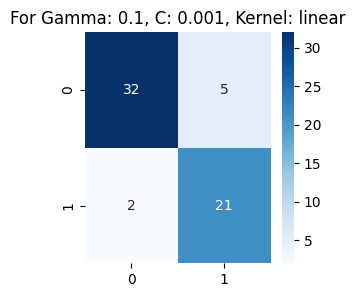

In [85]:
plt.figure(figsize=(3,3))
plt.title("For Gamma: 0.1, C: 0.001, Kernel: linear")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()